# Reading data from files

In [1]:
import pandas as pd
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
features_path = "D:\\MS\\DS\\Data Science Project\\UCI HAR Dataset\\UCI HAR Dataset\\features.txt"
TRAIN = "D:\\MS\\DS\\Data Science Project\\UCI HAR Dataset\\UCI HAR Dataset\\train\\"
TEST = "D:\\MS\\DS\\Data Science Project\\UCI HAR Dataset\\UCI HAR Dataset\\test\\"
LABELS = "D:\\MS\\DS\\Data Science Project\\UCI HAR Dataset\\UCI HAR Dataset\\"

In [29]:
def file_to_df(path):
    file_data = []   
    with open(path) as file:
        for line in file:
            # remove whitespace at the start and the newline at the end
            column = line.replace('  ', ' ').strip().split(' ')
            file_data.append(column)
        file_data =  pd.DataFrame(file_data)
    return file_data

In [25]:
features = file_to_df(features_path)
features = features.drop(0, axis=1)

In [30]:
X_train = file_to_df(TRAIN+"X_train.txt")

In [32]:
y_train = file_to_df(TRAIN+"y_train.txt")

In [43]:
# activity labels
labels = file_to_df(LABELS+"activity_labels.txt")
labels = labels.rename({0:"activity_num", 1:"activity"}, axis='columns')

In [45]:
# volunteers who performed the activities for this dataset
subjects = file_to_df(TRAIN+"subject_train.txt")

In [88]:
#adding column names to the dataset
X_train = X_train.rename(features[1], axis='columns')

In [74]:
X_test = file_to_df(TEST+"X_test.txt")

In [ ]:
y_test = file_to_df(TEST+"y_test.txt")

In [89]:
#adding column names to the dataset
X_test = X_test.rename(features[1], axis='columns')

### Exploratory Data Analysis ###

In [54]:
# Useful Constants

# Those are separate normalised input features for the neural network
INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]


In [50]:
# Load "X" (the training and testing inputs)

def load_X(X_signals_paths):
    X_signals = []
    
    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()
    
    return np.transpose(np.array(X_signals), (1, 2, 0))

In [51]:
def plot_signals(data, low_pass_filter, diff, title):
    plt.figure(figsize=(11, 9))
    plt.plot(data, color='red', label="Original signal, {} samples".format(signal_length))
    plt.plot(low_pass_filter, color='blue', label="Filtered low-pass with cutoff frequency of {} Hz".format(cutoff_frequency))
    plt.plot(diff, color='gray', label="What has been removed")
    plt.title(title)
    plt.xlabel('Time (1/50th sec. per tick)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

In [52]:
sample_rate = 50  # 50 Hz resolution
signal_length = 2.56*sample_rate  # 2.56 seconds

def butter_lowpass(cutoff, nyq_freq, order=4):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')#Numerator (b) and denominator (a) polynomials of the IIR filter.
    return b, a

def butter_lowpass_filter(data, cutoff_freq, nyq_freq, order=4):
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y




### For accelerator ###

In [73]:
cutoff_frequency = 20 # 20 Hz
acc_signals_paths = [
    TRAIN + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES[:3]
]
acc_signals = load_X(acc_signals_paths)

In [55]:
acc_signals_mean =  acc_signals.mean(axis=1)   

In [56]:
acc_signals_xyz = acc_signals_mean.transpose()

In [57]:
acc_signals_xyz[0].shape

(7352,)

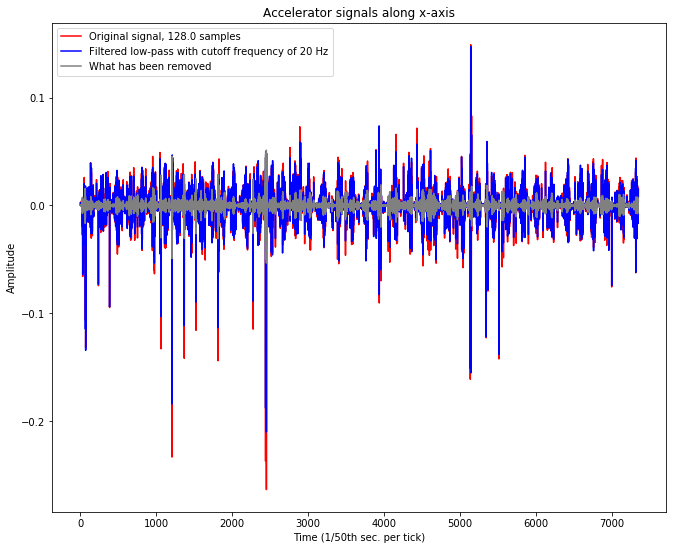

In [58]:
y = butter_lowpass_filter(acc_signals_xyz[0], cutoff_frequency, sample_rate/2)

# Difference acts as a special high-pass from a reversed butterworth filter. 
diff = np.array(acc_signals_xyz[0])-np.array(y)

# Visualize
plot_signals(acc_signals_xyz[0], y, diff, "Accelerator signals along x-axis")

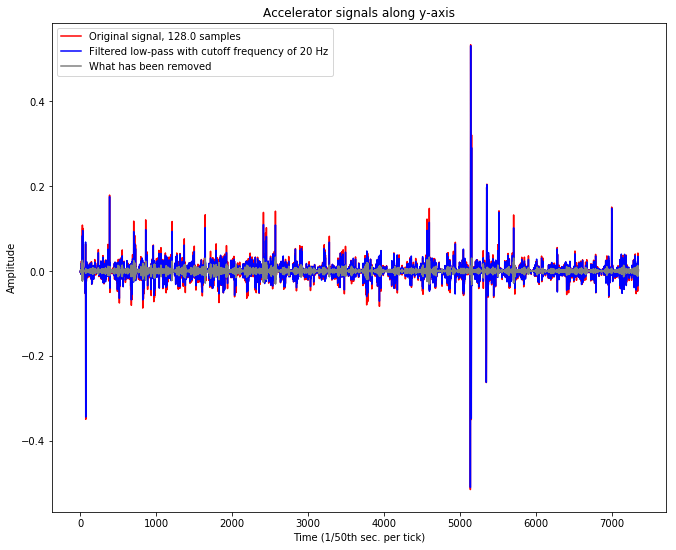

In [59]:
y = butter_lowpass_filter(acc_signals_xyz[1], cutoff_frequency, sample_rate/2)

# Difference acts as a special high-pass from a reversed butterworth filter. 
diff = np.array(acc_signals_xyz[1])-np.array(y)

# Visualize
plot_signals(acc_signals_xyz[1], y, diff, "Accelerator signals along y-axis")

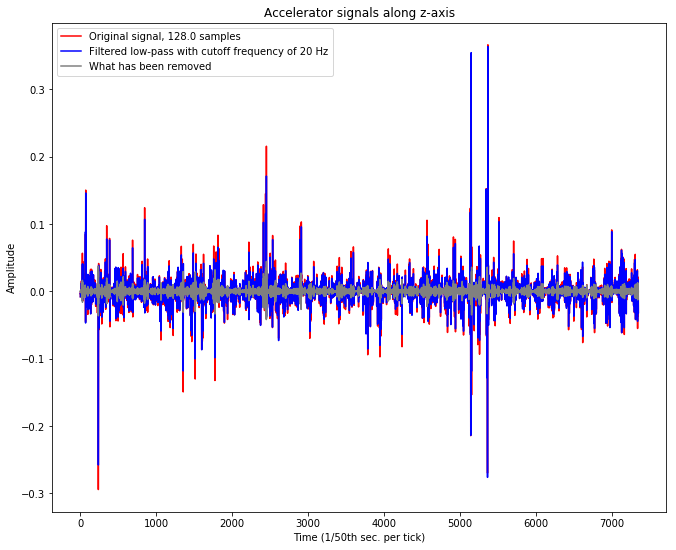

In [60]:
y = butter_lowpass_filter(acc_signals_xyz[2], cutoff_frequency, sample_rate/2)

# Difference acts as a special high-pass from a reversed butterworth filter. 
diff = np.array(acc_signals_xyz[2])-np.array(y)

# Visualize
plot_signals(acc_signals_xyz[2], y, diff, "Accelerator signals along z-axis")

### For gyroscope ###

In [61]:
gyr_signals_paths = [
    TRAIN + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES[3:6]
]
gyr_signals = load_X(gyr_signals_paths)

In [62]:
gyr_signals_mean =  gyr_signals.mean(axis=1)   

In [63]:
gyr_signals_xyz = gyr_signals_mean.transpose()

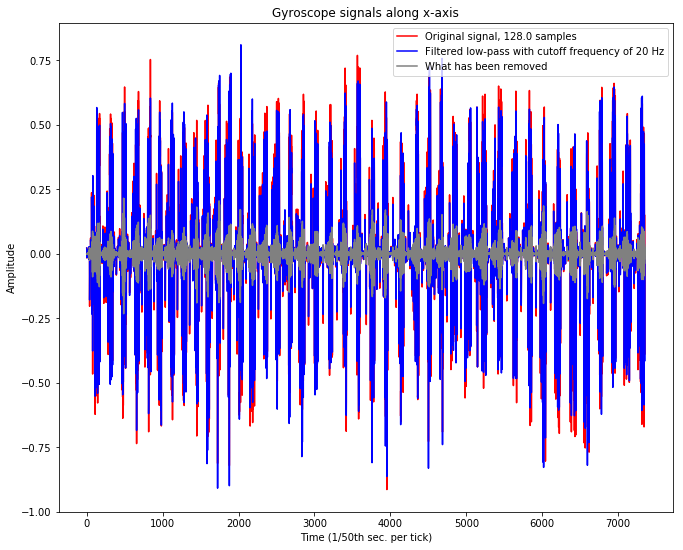

In [64]:
y = butter_lowpass_filter(gyr_signals_xyz[0], cutoff_frequency, sample_rate/2)

# Difference acts as a special high-pass from a reversed butterworth filter. 
diff = np.array(gyr_signals_xyz[0])-np.array(y)

# Visualize
plot_signals(gyr_signals_xyz[0], y, diff, "Gyroscope signals along x-axis")

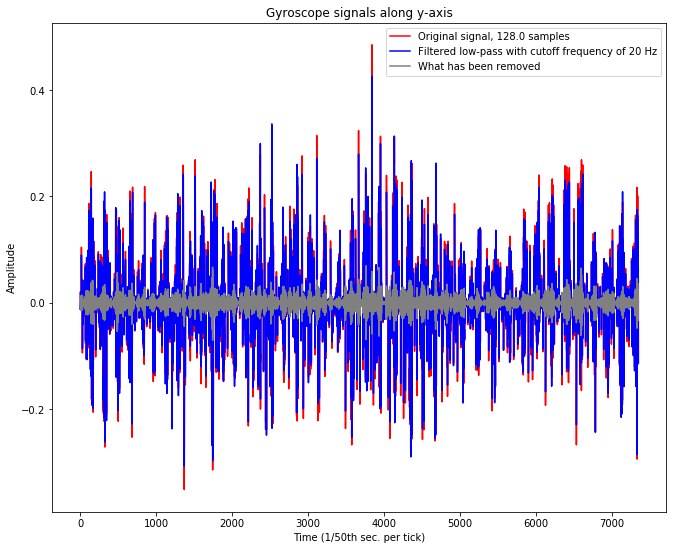

In [65]:
y = butter_lowpass_filter(gyr_signals_xyz[1], cutoff_frequency, sample_rate/2)

# Difference acts as a special high-pass from a reversed butterworth filter. 
diff = np.array(gyr_signals_xyz[1])-np.array(y)

# Visualize
plot_signals(gyr_signals_xyz[1], y, diff, "Gyroscope signals along y-axis")

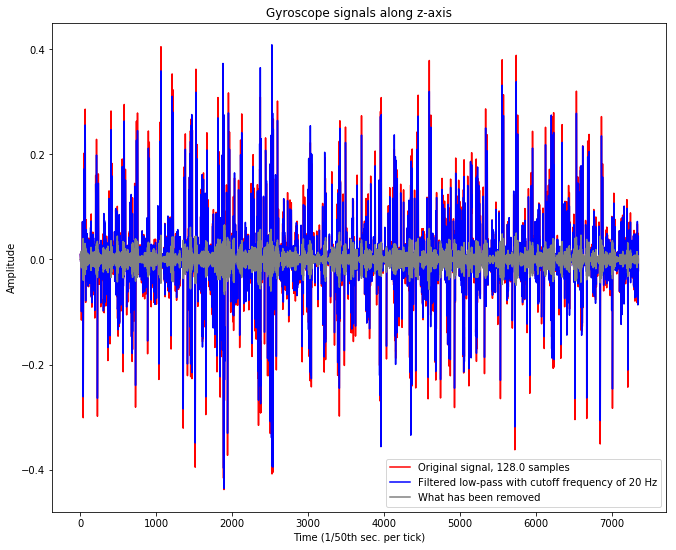

In [66]:
y = butter_lowpass_filter(gyr_signals_xyz[2], cutoff_frequency, sample_rate/2)

# Difference acts as a special high-pass from a reversed butterworth filter. 
diff = np.array(gyr_signals_xyz[2])-np.array(y)

# Visualize
plot_signals(gyr_signals_xyz[2], y, diff, "Gyroscope signals along z-axis")

### For total body acceleration ###

In [67]:
tacc_signals_paths = [
    TRAIN + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES[6:9]
]
tacc_signals = load_X(tacc_signals_paths)

In [68]:
tacc_signals_mean =  tacc_signals.mean(axis=1)   

In [69]:
tacc_signals_xyz = tacc_signals_mean.transpose()

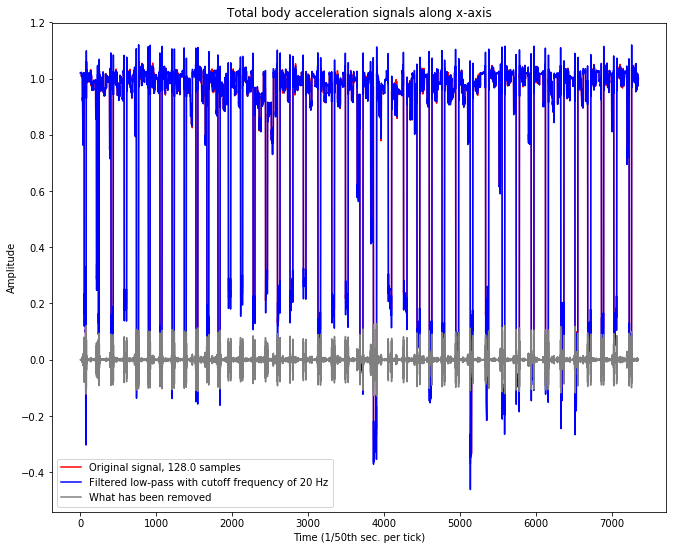

In [70]:
y = butter_lowpass_filter(tacc_signals_xyz[0], cutoff_frequency, sample_rate/2)

# Difference acts as a special high-pass from a reversed butterworth filter. 
diff = np.array(tacc_signals_xyz[0])-np.array(y)

# Visualize
plot_signals(tacc_signals_xyz[0], y, diff, "Total body acceleration signals along x-axis")

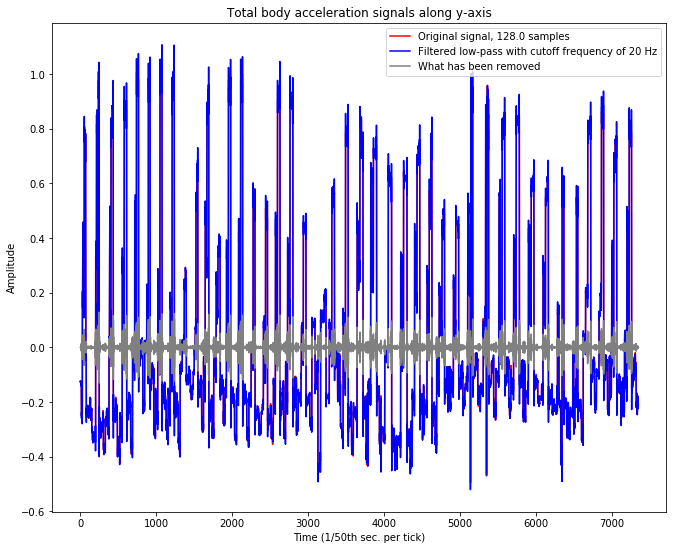

In [71]:
y = butter_lowpass_filter(tacc_signals_xyz[1], cutoff_frequency, sample_rate/2)

# Difference acts as a special high-pass from a reversed butterworth filter. 
diff = np.array(tacc_signals_xyz[1])-np.array(y)

# Visualize
plot_signals(tacc_signals_xyz[1], y, diff, "Total body acceleration signals along y-axis")

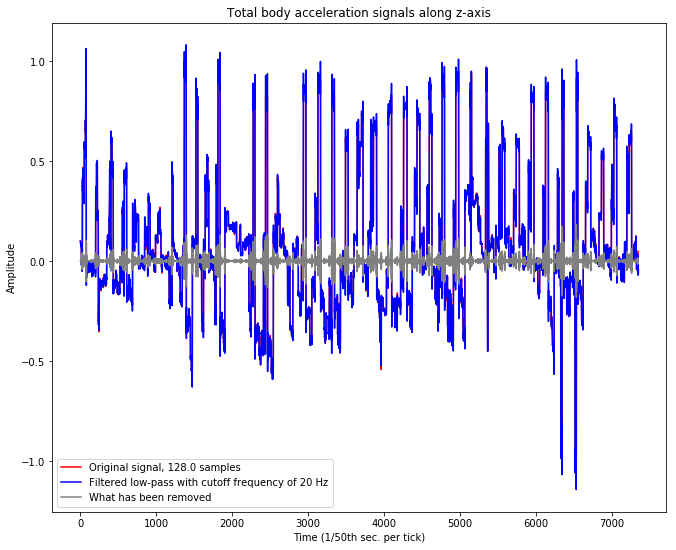

In [72]:
y = butter_lowpass_filter(tacc_signals_xyz[2], cutoff_frequency, sample_rate/2)

# Difference acts as a special high-pass from a reversed butterworth filter. 
diff = np.array(tacc_signals_xyz[2])-np.array(y)

# Visualize
plot_signals(tacc_signals_xyz[2], y, diff, "Total body acceleration signals along z-axis")